##### Autoregressive Moving Average (ARMA): Artificial data

In [15]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(12345)

Generate some data from an ARMA process:

In [28]:
arparams = np.array([.75, -.25])
print(arparams)
maparams = np.array([.65, .35])
print(maparams)

[ 0.75 -0.25]
[0.65 0.35]


The conventions of the arma_generate function require that we specify a 1 for the zero-lag of the AR and MA parameters and that the AR parameters be negated.

In [34]:
arparams = np.r_[1, -arparams]
maparams = np.r_[1, maparams]
nobs = 250

In [35]:
y = arma_generate_sample(arparams, maparams, nobs)
y

array([-7.61837213e-01, -1.85529132e+00, -3.93822365e+00, -4.60354264e+00,
       -3.18844164e+00, -2.75590831e+00, -3.79599138e+00, -3.59389074e+00,
       -5.09273507e-01,  9.91826581e-01, -2.23471570e-01, -1.86283450e+00,
       -9.25796103e-01,  7.77708819e-01,  1.06009600e-02, -1.13534151e+00,
       -1.55545334e-01,  1.42173323e+00,  1.75538224e+00,  1.85792409e+00,
        8.69525400e-01, -3.77225940e+00, -7.09829068e+00, -6.10325576e+00,
       -2.35022690e+00, -1.51253623e+00, -9.62126333e-01,  2.66395061e+00,
        5.34607811e+00,  3.32821473e+00,  1.42872948e+00,  1.08365701e+00,
       -5.15337659e-01, -2.02848924e+00, -1.01124424e+00,  7.82431125e-01,
        1.93243692e+00,  2.32374899e+00,  1.58118105e+00,  2.72009473e-01,
       -1.73876687e+00, -3.63427059e+00, -4.43575249e+00, -4.31530256e+00,
       -3.62991667e+00, -2.35267056e+00, -5.67402344e-01,  7.86456497e-01,
        1.46762048e+00,  6.27109282e-01,  4.44440515e-01,  4.66654767e-01,
       -8.08059056e-01, -

In [36]:
dates = sm.tsa.datetools.dates_from_range('1980m1', length=nobs)
y = pd.Series(y, index=dates)
y.head()

1980-01-31   -0.761837
1980-02-29   -1.855291
1980-03-31   -3.938224
1980-04-30   -4.603543
1980-05-31   -3.188442
dtype: float64

In [37]:
y.tail()

2000-06-30    3.519557
2000-07-31    2.515650
2000-08-31   -0.140649
2000-09-30   -1.834207
2000-10-31   -1.313708
dtype: float64

In [40]:
arma_mod = sm.tsa.ARMA(y, order=(2,2))
arma_mod

c:\users\reddy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [43]:
arma_res = arma_mod.fit(trend='nc', disp=-1)
arma_res

In [46]:
arma_res.conf_int()

,0,1
ar.L1.y,0.273261,0.641200
ar.L2.y,-0.142938,0.202848
ma.L1.y,1.224411,1.494849
ma.L2.y,0.548413,0.791463


In [47]:
print(arma_res.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  250
Model:                     ARMA(2, 2)   Log Likelihood                -339.620
Method:                       css-mle   S.D. of innovations              0.935
Date:                Sun, 09 Feb 2020   AIC                            689.240
Time:                        17:59:25   BIC                            706.847
Sample:                    01-31-1980   HQIC                           696.327
                         - 10-31-2000                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.4572      0.094      4.871      0.000       0.273       0.641
ar.L2.y        0.0300      0.088      0.340      0.734      -0.143       0.203
ma.L1.y        1.3596      0.069     19.707      0.0

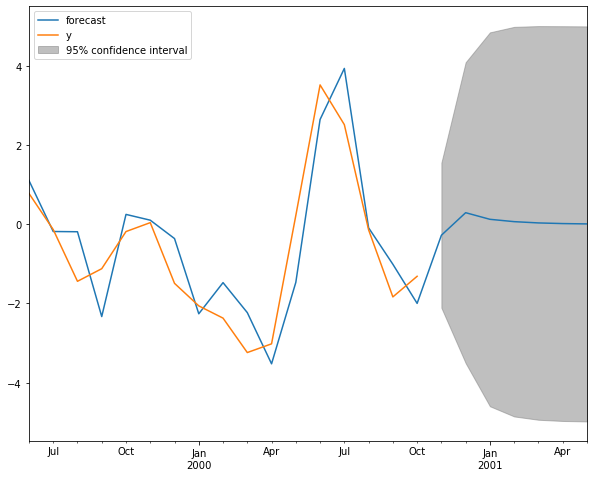

In [57]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8))
fig = arma_res.plot_predict(start='1999-06-30', end='2001-05-31', ax=ax)

legend = ax.legend(loc='upper left')